In [1]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import yfinance as yf  #Yahoo Finance
import pandas_datareader.data as web

In [2]:
#YAHOO FINANCE DATA

NDX = yf.Ticker("NDX")
NDX_hist = NDX.history(period="max")

NIKKEI = yf.Ticker("^N225")
NIKKEI_hist = NIKKEI.history(period="max")

CHINA = yf.Ticker("000001.SS")
CHINA_hist = CHINA.history(period="max")

BTCUSD_X = yf.Ticker("BTC-USD")
BTCUSD_X_hist = BTCUSD_X.history(period="max")

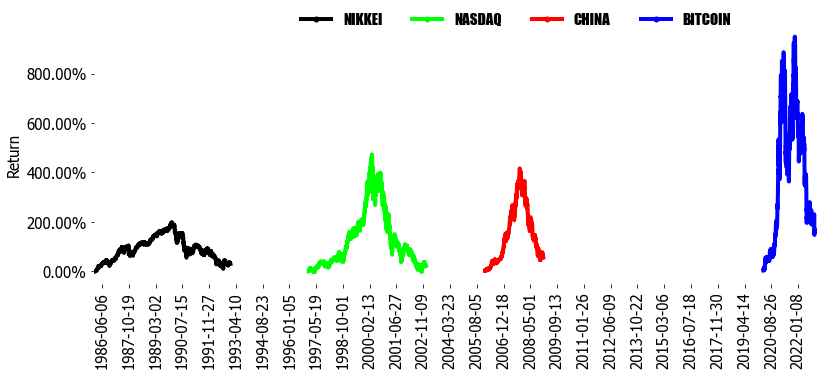

In [4]:
#------------------------CUMULATIVE RETURN CHART -----------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 500

start_nikkei = datetime(1985, 12, 31)
end_nikkei = datetime(1992, 12, 31)

NIKKEI_hist2 = NIKKEI_hist.loc[(NIKKEI_hist.index >=start_nikkei)&(NIKKEI_hist.index < end_nikkei)]
NIKKEI_hist2['daily_return'] = NIKKEI_hist2['Close'][1:].values/NIKKEI_hist2['Close'][:-1]-1
NIKKEI_hist2['cumulative_return']=(1 + NIKKEI_hist2['daily_return']).cumprod() - 1
NIKKEI_hist2['cumulative_return'][1:]= NIKKEI_hist2['cumulative_return'][:-1]

start_ndx = datetime(1996, 12, 31)
end_ndx = datetime(2002, 12, 31)

NDX_hist2 = NDX_hist.loc[(NDX_hist.index >=start_ndx)&(NDX_hist.index < end_ndx)]
NDX_hist2['daily_return'] = NDX_hist2['Close'][1:].values/NDX_hist2['Close'][:-1]-1
NDX_hist2['cumulative_return']=(1 + NDX_hist2['daily_return']).cumprod() - 1
NDX_hist2['cumulative_return'][1:]= NDX_hist2['cumulative_return'][:-1]

start_china = datetime(2005, 12, 31)
end_china = datetime(2008, 12, 31)

CHINA_hist2 = CHINA_hist.loc[(CHINA_hist.index >=start_china)&(CHINA_hist.index < end_china)]
CHINA_hist2['daily_return'] = CHINA_hist2['Close'][1:].values/CHINA_hist2['Close'][:-1]-1
CHINA_hist2['cumulative_return']=(1 + CHINA_hist2['daily_return']).cumprod() - 1
CHINA_hist2['cumulative_return'][1:]= CHINA_hist2['cumulative_return'][:-1]


start_btcusd = datetime(2020, 3, 31)
end_btcusd = datetime(2022, 12, 31)

BTCUSD_X_hist2 = BTCUSD_X_hist.loc[(BTCUSD_X_hist.index >=start_btcusd)&(BTCUSD_X_hist.index < end_btcusd)]
BTCUSD_X_hist2['daily_return'] = BTCUSD_X_hist2['Close'][1:].values/BTCUSD_X_hist2['Close'][:-1]-1
BTCUSD_X_hist2['cumulative_return']=(1 + BTCUSD_X_hist2['daily_return']).cumprod() - 1
BTCUSD_X_hist2['cumulative_return'][1:]= BTCUSD_X_hist2['cumulative_return'][:-1]

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(NIKKEI_hist2.index,NIKKEI_hist2['cumulative_return']*100,marker='o', linestyle='solid',linewidth=4,color='black',alpha=0.99,label='NIKKEI',markersize=1)
ax1.plot(NDX_hist2.index,NDX_hist2['cumulative_return']*100,marker='o', linestyle='solid',linewidth=4,color='lime',alpha=0.99,label='NASDAQ',markersize=1)
ax1.plot(CHINA_hist2.index,CHINA_hist2['cumulative_return']*100,marker='o', linestyle='solid',linewidth=4,color='red',alpha=0.99,label='CHINA',markersize=1)
ax1.plot(BTCUSD_X_hist2.index,BTCUSD_X_hist2['cumulative_return']*100,marker='o', linestyle='solid',linewidth=4,color='blue',alpha=0.99,label='BITCOIN',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.9, 1.1),ncol=10,markerscale=5)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([start_nikkei, end_btcusd, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.ylabel('Return',fontname = "Tahoma",fontsize=15 )
plt.box(on=None)


plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()